<a href="https://colab.research.google.com/github/laboratoriodecodigos/Colab-Python/blob/main/AdaBoosting_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ADABOOST EN EL DATASET WINE

# Paso 1: Importar librerías
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd



In [ ]:
# Paso 2: Cargar el dataset Wine
wine = load_wine()
X = wine.data
y = wine.target

x = pd.DataFrame(X, columns=wine.feature_names)
x['target'] = y

display(x)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


🔍 Primeros datos del dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



📊 Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


/tmp/ipython-input-566059909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="viridis")


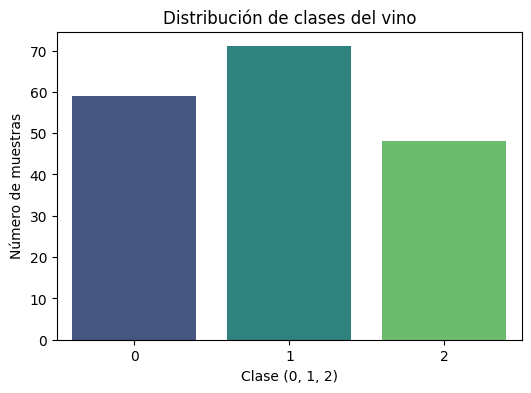

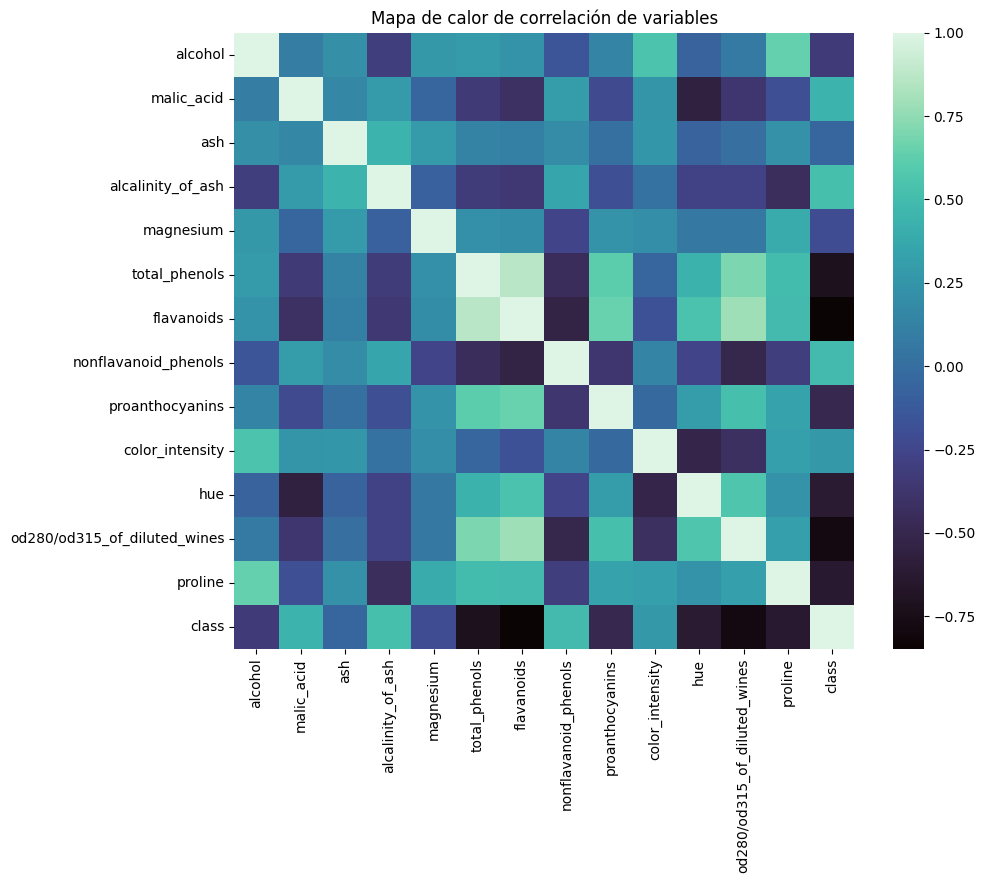

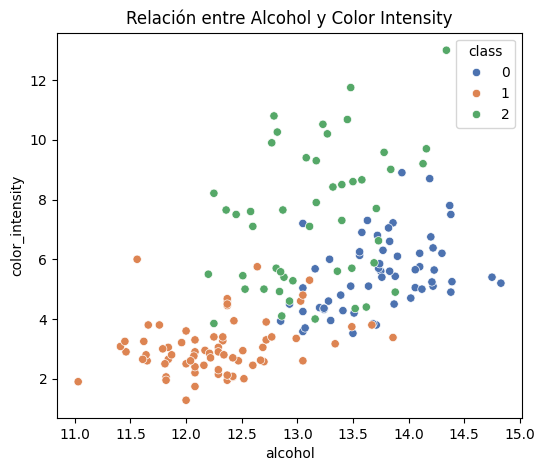

In [ ]:
# ============================================================
# 🍷 VISUALIZACIÓN Y CARGA DEL DATASET DEL VINO
# ============================================================

# Paso 1: Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Paso 2: Cargar el dataset Wine
wine = load_wine()
X = wine.data
y = wine.target

# Convertir a DataFrame para visualizar mejor
df = pd.DataFrame(X, columns=wine.feature_names)
df["class"] = y

# Mostrar las primeras filas
print("🔍 Primeros datos del dataset:")
display(df.head())

# Descripción estadística
print("\n📊 Estadísticas descriptivas:")
display(df.describe().T)

# Paso 3: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Paso 4: Visualización de clases
plt.figure(figsize=(6, 4))
sns.countplot(x="class", data=df, palette="viridis")
plt.title("Distribución de clases del vino")
plt.xlabel("Clase (0, 1, 2)")
plt.ylabel("Número de muestras")
plt.show()

# Paso 5: Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="mako", annot=False)
plt.title("Mapa de calor de correlación de variables")
plt.show()

# Paso 6: Gráfico de dispersión de dos variables clave
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="alcohol",
    y="color_intensity",
    hue="class",
    palette="deep"
)
plt.title("Relación entre Alcohol y Color Intensity")
plt.show()


In [ ]:
# Paso 3: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# Paso 4: Definir modelo base (árbol débil) y clasificador AdaBoost
base_model = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=150,       # Más clasificadores débiles
    learning_rate=0.4,      # Tasa de aprendizaje
    random_state=42
)

In [ ]:
# Paso 5: Entrenar el modelo
adaboost.fit(X_train, y_train)

# Paso 6: Hacer predicciones
y_pred = adaboost.predict(X_test)

In [ ]:
# Paso 7: Evaluar desempeño
print("✅ Exactitud del modelo:", accuracy_score(y_test, y_pred))
print("\n📊 Reporte de clasificación:\n", classification_report(y_test, y_pred))

✅ Exactitud del modelo: 0.9259259259259259

📊 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.95      0.86      0.90        21
           2       0.87      0.93      0.90        14

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.92        54
weighted avg       0.93      0.93      0.93        54



In [ ]:
# Paso 8: Validación cruzada para estabilidad del modelo
scores = cross_val_score(adaboost, X, y, cv=5)
print("\n🔁 Validación cruzada (5 folds):")
print("Resultados individuales:", scores)
print("Promedio de exactitud:", np.mean(scores))



🔁 Validación cruzada (5 folds):
Resultados individuales: [0.83333333 0.86111111 0.88888889 1.         0.97142857]
Promedio de exactitud: 0.910952380952381
